Importing libraries 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

ModuleNotFoundError: No module named 'pandas'

**Library Import**<br>

<small>**pandas as pd:** For data manipulation and analysis.<br>
**numpy as np:** For numerical operations.<br>
**seaborn as sns:** For statistical data visualization, offering powerful tools for creating informative and attractive statistical graphics.<br>
**%matplotlib inline:** Jupyter Notebook magic command and enables plots to be displayed directly in the notebook.<small>


Loading the data into the data frame

In [5]:
data_frame = pd.read_csv("dataset/kaggle_train.csv")
# To display the top 5 rows 
data_frame.head(5) 

NameError: name 'pd' is not defined

In [ ]:
data_frame = data_frame.drop(['id', 'CustomerId', 'Surname'], axis=1)
# The code removes the id, CustomerId, and Surname columns from the DataFrame df using the drop() method.
data_frame.head(5)
# df.head(5) in pandas returns the first 5 rows of the DataFrame data_frame.

One Hot Encoding gender and geography

In [4]:
# OneHotEncoder from sklearn.preprocessing is used to convert categorical variables into a binary matrix 
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Select categorical features
categorical_features = ['Geography', 'Gender']

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(data_frame[categorical_features])

# Get new column names
encoded_columns = encoder.get_feature_names_out(categorical_features)

# Create DataFrame with encoded values
dataframe_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=data_frame.index)

# Drop original categorical columns and concatenate encoded data
data_frame = data_frame.drop(columns=categorical_features).join(dataframe_encoded)

data_frame.head(5)

ModuleNotFoundError: No module named 'sklearn'

**One-Hot Encoding**<br> 
<small>It converts categorical variables into binary vectors, where each category is represented by a vector with a 1 in the corresponding category position and 0s elsewhere. This ensures categorical data is transformed into a numerical format suitable for machine learning.<br>

**encoder = OneHotEncoder(sparse_output=False)**<br>
Initializes the OneHotEncoder with sparse_output=False to ensure the encoded data is returned as a dense matrix (NumPy array).<br>

**categorical_features = ['Geography', 'Gender']**<br>
Specifies the list of categorical features (Geography and Gender) to be encoded.<br>

**encoded_data = encoder.fit_transform(df[categorical_features])**<br>
Fits the encoder to the categorical data and transforms it into binary vectors (one-hot encoded format).

**encoded_columns = encoder.get_feature_names_out(categorical_features)**<br>
Retrieves the names of the newly created columns after encoding, corresponding to each category of the original features.<br>

**dataframe_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)**<br>
Creates a DataFrame with the encoded values, using the column names and retaining the original index of df.<br>

**df = df.drop(columns=categorical_features).join(dataframe_encoded)**<br>
Drops the original categorical columns from df and joins the newly encoded columns, updating df with the encoded data.<small>


In [ ]:

data_frame.info()
# provides a summary of the DataFrame, including the number of entries, column names, non-null counts, and data types.


In [ ]:
# convert specific columns in the DataFrame (Exited, IsActiveMember, HasCrCard, and the encoded Geography and Gender columns) to boolean data types.

data_frame['Exited'] = data_frame['Exited'].astype(bool)
data_frame['IsActiveMember'] = data_frame['IsActiveMember'].astype(bool)
data_frame['HasCrCard'] = data_frame['HasCrCard'].astype(bool)
data_frame['Geography_France'] = data_frame['Geography_France'].astype(bool)
data_frame['Geography_Germany'] = data_frame['Geography_Germany'].astype(bool)
data_frame['Geography_Spain'] = data_frame['Geography_Spain'].astype(bool)
data_frame['Gender_Female'] = data_frame['Gender_Female'].astype(bool)
data_frame['Gender_Male'] = data_frame['Gender_Male'].astype(bool)

data_frame.info()


In [ ]:
data_frame.describe()
# provides a summary of statistical information for numerical columns in the DataFrame 
# including count, mean, standard deviation, minimum, maximum, and percentiles

Distribution of features TBD

Compare the distribution of features for each target class:

In [ ]:
# Identify numerical columns
num_columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()
# num_cols.remove('Exited')

**<small> data_frame.select_dtypes(include=[np.number]).columns.tolist()**<br>
 It selects all columns in the DataFrame df that have numerical data types (e.g., integers or floats) and stores their names as a list in the variable num_cols<small>

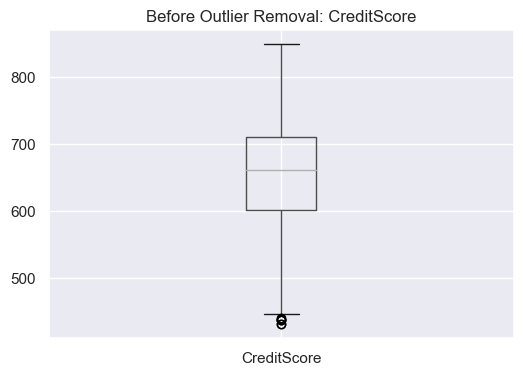

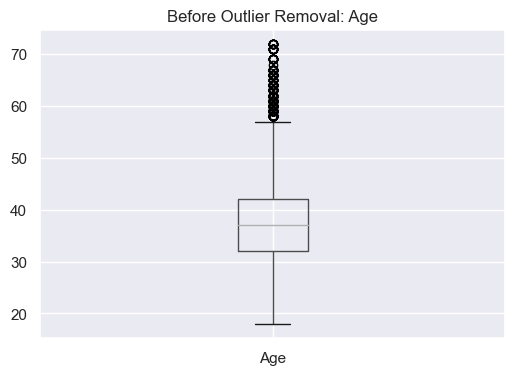

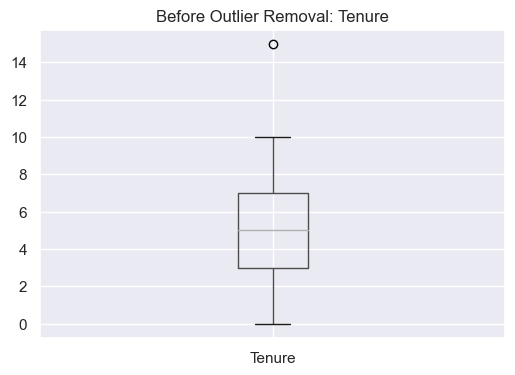

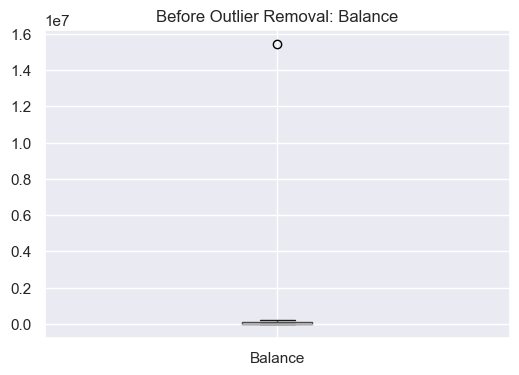

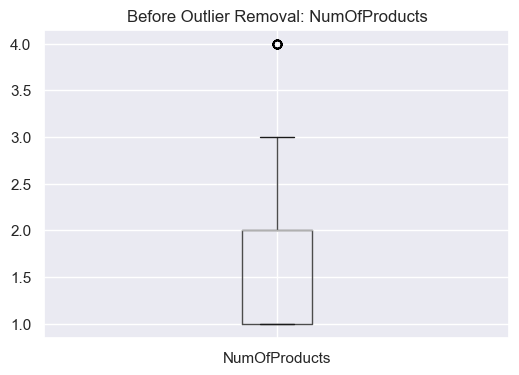

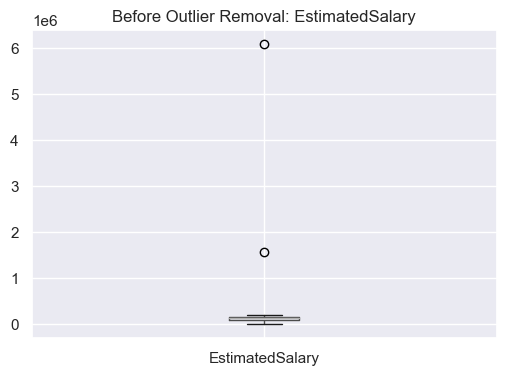

In [ ]:
# Function to detect and remove outliers using IQR
def remove_outliers(data_frame, columns):
    df_cleaned = data_frame.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned
# Plot box plots before removing outliers for each feature
for col in num_columns:
    plt.figure(figsize=(6, 4))
    data_frame.boxplot(column=[col])
    plt.title(f"Before Outlier Removal: {col}")
    plt.show()

<small>**Define remove_outliers():** Removes outliers based on IQR method. <br>
**Calculate IQR:** Finds Q1, Q3, and IQR for each column.<br>
**Set bounds:** Determines lower and upper bounds using 1.5 * IQR.<br>
**Filter outliers:** Removes rows with values outside the bounds.<br>
**Box plots:** Displays box plots to visualize outliers before removal.<br>
Plotted the graphs of before outlier (credit score, age, tenure, balance, no of products and estimated salary).<small>

see details of outliers

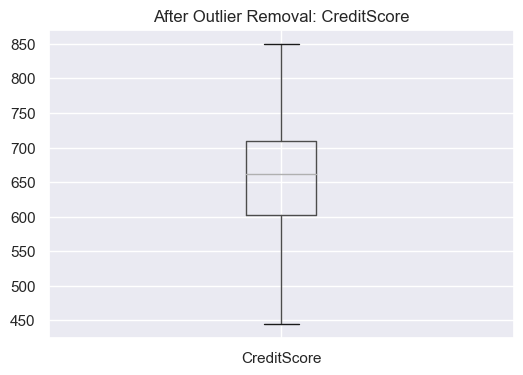

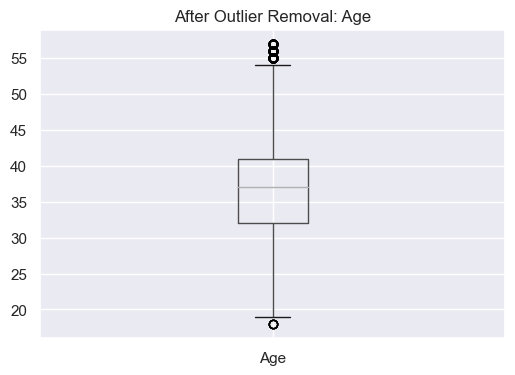

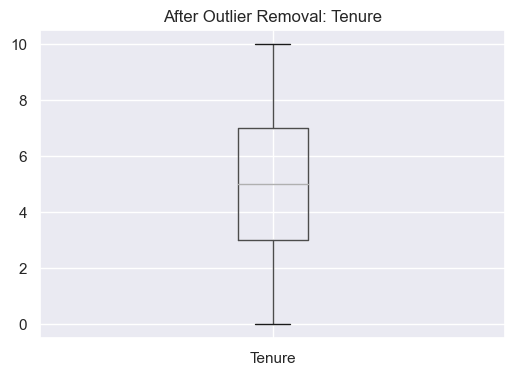

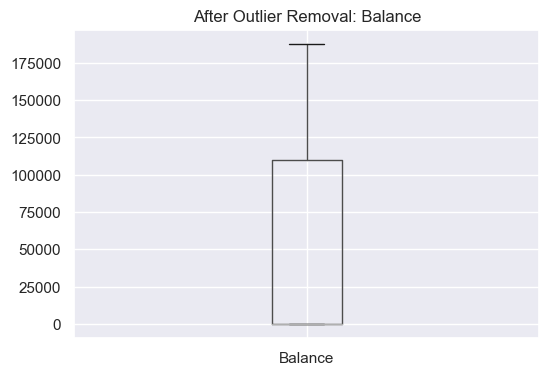

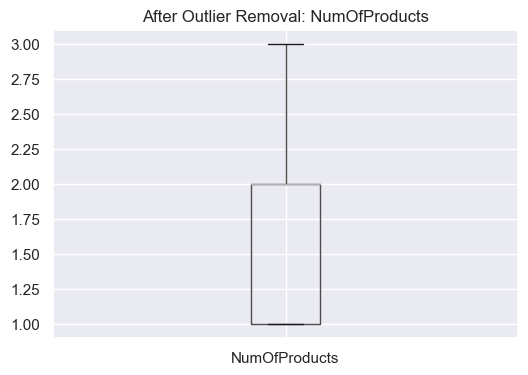

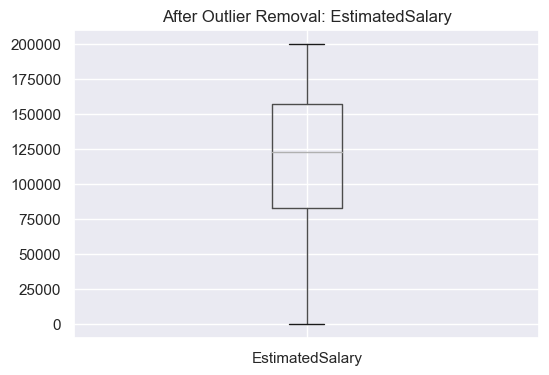

Original shape: (13500, 14)
New shape after outlier removal: (13093, 14)


In [ ]:
#convcerting bool to float
# data_frame['Exited'] = data_frame['Exited'].astype('float64')
data_frame['IsActiveMember'] = data_frame['IsActiveMember'].astype('float64')
data_frame['HasCrCard'] = data_frame['HasCrCard'].astype('float64')
data_frame['Geography_France'] = data_frame['Geography_France'].astype('float64')
data_frame['Geography_Germany'] = data_frame['Geography_Germany'].astype('float64')
data_frame['Geography_Spain'] = data_frame['Geography_Spain'].astype('float64')
data_frame['Gender_Female'] = data_frame['Gender_Female'].astype('float64')
data_frame['Gender_Male'] = data_frame['Gender_Male'].astype('float64')


# Remove outliers

df_cleaned = remove_outliers(data_frame, num_columns)

# Plot box plots after removing outliers for each feature
for col in num_columns:
    plt.figure(figsize=(6, 4))
    df_cleaned.boxplot(column=[col])
    plt.title(f"After Outlier Removal: {col}")
    plt.show()

# Print shape before and after
print("Original shape:", data_frame.shape)
print("New shape after outlier removal:", df_cleaned.shape)

# Save cleaned dataset
df_cleaned.to_csv("cleaned_data.csv", index=False)



1. **<small>Convert Boolean to Float**: Converts boolean columns to `float64`. <br>
2. **Remove Outliers**: Removes outliers using IQR. <br>
3. **Plot Box Plots**: Plots box plots after outlier removal. <br>
4. **Print Shape**: Prints shape before and after outlier removal. <br>
5. **Save Cleaned Data**: Saves cleaned DataFrame to CSV without index.<small> <br>


Scaling using Z Score normalisation


### Z-Score Normalization (Standardization)

### <small> Definition:
Z-score normalization, also known as **standardization**, transforms data so that it has a **mean of 0** and a **standard deviation of 1**.

### Formula:
\[
Z = {X - mu}/{sigma}
\]
where:  
-  X = Original data point  
-  mu = Mean of the dataset  
- sigma  = Standard deviation of the dataset  

### Purpose:
- Standardizes features to a common scale.
- Improves performance of ML models, especially those using distance-based algorithms (Logistic Regression, SVM, K-Means, etc.).
- Helps in handling features with different units or ranges.<small>




In [ ]:
data_frame.info()
df_cleaned.info()
# df_cleaned.info() provides a summary of the cleaned DataFrame, showing the number of rows and columns, column names with their data types, and the count of non-null values

In [ ]:
# imports the StandardScaler class, which standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Define the split point
split_point = int(0.8 * len(data_frame))

# Split the data into training and testing sets
train_df = df_cleaned[:split_point]
test_df = df_cleaned[split_point:]

# Print the shapes of the resulting datasets
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")


# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns 
num_cols = train_df.select_dtypes(include=['float64']).columns.tolist()

# Apply Z-score normalization (StandardScaler) to numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df['Exited'] = train_df['Exited'].astype('float64')
test_df['Exited'] = test_df['Exited'].astype('float64')



# df_cleaned['IsActiveMember'] = df_cleaned['IsActiveMember'].astype(int)
# df_cleaned['HasCrCard'] = df_cleaned['HasCrCard'].astype(int)
# df_cleaned['Geography_France'] = df_cleaned['Geography_France'].astype(int)
# df_cleaned['Geography_Germany'] = df_cleaned['Geography_Germany'].astype(int)
# df_cleaned['Geography_Spain'] = df_cleaned['Geography_Spain'].astype(int)
# df_cleaned['Gender_Female'] = df_cleaned['Gender_Female'].astype(int)
# df_cleaned['Gender_Male'] = df_cleaned['Gender_Male'].astype(int)

print(test_df.head())


**<small>Define Split Point:** Calculates the split point at 80% of the data length for training and testing sets.<br><br>
**Split Data:** Splits df_cleaned into training (train_df) and testing (test_df) sets based on the split point.<br><br>
**Print Dataset Shapes:** Prints the shapes of train_df and test_df to show the size of the datasets.<br><br>
**Initialize StandardScaler:** Initializes the StandardScaler to standardize numerical features.<br><br>
**Select Numerical Columns:** Selects columns with float64 data type from train_df for scaling.<br><br>
**Apply Z-score Normalization:** Standardizes numerical columns in both train_df and test_df using StandardScaler.<br><br>
**Convert 'Exited' to Float:** Converts the Exited column in both train_df and test_df to float64 for numerical processing.<br><br>
**Print Test Data:** Displays the first few rows of test_df to check the transformed data.<small>

Spliting data 


In [ ]:
train_df.info()

**Logistic regression**<br>
<small>Logistic regression is a statistical model used for binary classification, predicting the probability of a categorical dependent variable. It applies the logistic function to map predicted values to a range between 0 and 1, representing the likelihood of a particular class. The formula for logistic regression is:

\[
P(Y = 1|X) = 1/{1 + e^{-(b0 + b1X1 + b2X2 +....+ bnXn)}}
\]

Where \( P(Y = 1|X) \) is the probability of the target variable \( Y \) being 1 given the features \( X \), and the \(b)'s are the model coefficients.<small>


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Log-Loss)
def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -1/m * (np.dot(y, np.log(predictions)) + np.dot((1 - y), np.log(1 - predictions)))
    return cost

# Gradient Descent function to optimize the weights
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradients = 1/m * np.dot(X.T, (predictions - y))
        weights -= learning_rate * gradients

        # Save the cost to track the convergence
        cost_history.append(cost_function(X, y, weights))
        
    return weights, cost_history

# Logistic Regression function
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    # Add a column of ones to X for the intercept term
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Initialize weights
    weights = np.zeros(X.shape[1])
    
    # Train the model
    optimized_weights, cost_history = gradient_descent(X, y, weights, learning_rate, num_iterations)
    
    return optimized_weights, cost_history

# Features and target
y_train = train_df['Exited'].values
X_train = train_df.drop(columns=['Exited']).values

# Ensure X_train and X_test are 2D arrays (matrices)
X_train = np.array(X_train) if not isinstance(X_train, np.ndarray) else X_train

# Train the Logistic Regression model on the training data
weights, cost_history = logistic_regression(X_train, y_train, learning_rate=0.1, num_iterations=1000)

# Print final weights
print("Optimized weights:", weights)

# Plot the cost function convergence
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Convergence of Cost Function")
plt.show()






1. **<small>Import Metrics**: `accuracy_score`, `precision_score`, `recall_score`, and `f1_score` are imported for later evaluation of the model's performance.

2. **Sigmoid Function**: Defines the sigmoid function which maps the output of the linear equation to the range (0,1) representing probabilities.

   \[
   sigma(z) = 1/{1 + e^{-z}}
   \]

3. **Cost Function**: Defines the logistic regression cost function (log-loss) which calculates the error between predicted probabilities and actual values. It is used to evaluate how well the model fits the data.

   \[
    Cost = -(1/m)*{ y*log(y_hat) + (1 - y) \log(1 - y_hat)}
   \]

4. **Gradient Descent**: Optimizes the weights of the logistic regression model by minimizing the cost function. It iteratively updates the weights using the gradients.

5. **Logistic Regression Model**: Defines the logistic regression function that initializes weights, adds the intercept term (column of ones), and applies gradient descent to train the model.

6. **Prepare Features and Target**: Splits the features (`X_train`) and target (`y_train`) from the training dataset (`train_df`).

7. **Train the Model**: Calls the logistic regression function to train the model on `X_train` and `y_train` using a specified learning rate and number of iterations.

8. **Print Optimized Weights**: After training, the optimized weights (coefficients) are printed.

9. **Plot Cost Function Convergence**: Plots the convergence of the cost function over iterations to show how the cost decreases as the model improves.<small>




In [ ]:
y_test = test_df['Exited'].values
X_test = test_df.drop(columns=['Exited']).values

X_test = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test

X_test_later = X_test
y_test_later = y_test
X_train_later = X_train
y_train_later = y_train

# Add intercept term (column of ones) to test data
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Predict on the test data
predictions = (sigmoid(np.dot(X_test, weights)) >= 0.5).astype(int)  # Classify as 1 if probability >= 0.5, else 0

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

1. **<small>Extract Features and Target from Test Data**:  
   - `X_test` contains feature variables (independent variables).  
   - `y_test` stores the target variable (`Exited`).  

2. **Ensure `X_test` is a NumPy Array**:  
   - Converts `X_test` into a NumPy array if it isn't already.  

3. **Backup Training and Test Data**:  
   - Saves copies of `X_test`, `y_test`, `X_train`, and `y_train` for later use.  

4. **Add Intercept Term to `X_test`**:  
   - Adds a column of ones to `X_test` for the intercept in the logistic regression model.  

5. **Make Predictions**:  
   - Computes the probability of class 1 (`Exited = 1`) using the sigmoid function.  
   - Converts probabilities to class labels (1 if probability ≥ 0.5, else 0).  

6. **Evaluate the Model**:  
   - Calculates accuracy, precision, recall, and F1-score using evaluation metrics from `sklearn.metrics`.  

7. **Print Evaluation Metrics**:  
   - Displays accuracy, precision, recall, and F1-score to assess the model’s performance. <small>


Evaluting on pretrained

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and evaluate LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_later, y_train_later)
log_reg_predictions = log_reg.predict(X_test_later)

# Train and evaluate SVC
svc = SVC()
svc.fit(X_train_later, y_train_later)
svc_predictions = svc.predict(X_test_later)

# Train and evaluate DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_later, y_train_later)
dtc_predictions = dtc.predict(X_test_later)

# Evaluate all models
def evaluate_model(y_true, predictions, model_name):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print('-' * 50)

# Evaluate Logistic Regression
evaluate_model(y_test, log_reg_predictions, "Logistic Regression")

# Evaluate SVC
evaluate_model(y_test, svc_predictions, "SVC")

# Evaluate Decision Tree Classifier
evaluate_model(y_test, dtc_predictions, "Decision Tree Classifier")

### **Theory Behind Model Training and Evaluation**

<small>**1. Introduction**
- In machine learning, different classification models are used to predict categorical outcomes.  
- We train and evaluate **Logistic Regression**, **Support Vector Classifier (SVC)**, and **Decision Tree Classifier** to compare their performance.  

**2. Logistic Regression**
- A statistical model that uses the **sigmoid function** to predict probabilities between 0 and 1.  
- It is best suited for **binary classification** problems.  
- Optimizes weights using **gradient descent** and minimizes **log loss**.  

**3. Support Vector Classifier (SVC)**
- A **supervised learning model** that finds the best hyperplane to separate classes.  
- Uses **kernel functions** to transform data into higher dimensions for better separation.  
- Works well for both **linear and non-linear** classification problems.  

 **4. Decision Tree Classifier**
- A tree-based model that makes decisions by **splitting the dataset** into sub-groups.  
- Splits are made based on **Gini Impurity** or **Entropy (Information Gain)**.  
- Tends to **overfit** without regularization (like pruning).  

 **5. Performance Metrics**
- **Accuracy**: Measures the overall correctness of the model.  
- **Precision**: Measures how many predicted positives are actually correct.  
- **Recall**: Measures how many actual positives are correctly predicted.  
- **F1 Score**: Harmonic mean of precision and recall, useful for imbalanced datasets.  

**6. Model Evaluation Approach**
- Train each model using **training data**.  
- Predict outputs using **test data**.  
- Calculate **accuracy, precision, recall, and F1-score** to compare performance.  

**7. Conclusion**
- Each model has its **strengths and weaknesses**.  
- **Logistic Regression** works well for **linear relationships**.  
- **SVC** is effective for **complex decision boundaries**.  
- **Decision Tree** is interpretable but **prone to overfitting**.  
- Choosing the best model depends on the **data distribution and problem requirements<small>**.  


Kaggle non comp

In [ ]:
kaggle_df = pd.read_csv("dataset/kaggle_test.csv")
# To display the top 5 rows 
kaggle_df.head(5) 

In [ ]:
kaggle_df = kaggle_df.drop(['id', 'CustomerId', 'Surname'], axis=1)
kaggle_df.head(5)

In [444]:

from sklearn.preprocessing import OneHotEncoder



# Fit and transform the categorical data
encoded_data = encoder.transform(kaggle_df[categorical_features])

# Get new column names
encoded_columns = encoder.get_feature_names_out(categorical_features)

# Create DataFrame with encoded values
kaggle_df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=kaggle_df.index)

# Drop original categorical columns and concatenate encoded data
kaggle_df = kaggle_df.drop(columns=categorical_features).join(kaggle_df_encoded)

kaggle_df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,651.0,29.0,3.0,0.0,1.0,1.0,0.0,199805.63,1.0,0.0,0.0,1.0,0.0
1,576.0,30.0,4.0,0.0,2.0,1.0,1.0,74415.20,0.0,0.0,1.0,1.0,0.0
2,678.0,31.0,8.0,0.0,2.0,0.0,1.0,121568.37,0.0,0.0,1.0,0.0,1.0
3,738.0,35.0,8.0,0.0,2.0,0.0,1.0,187616.16,0.0,0.0,1.0,1.0,0.0
4,584.0,50.0,5.0,0.0,1.0,0.0,0.0,97938.59,1.0,0.0,0.0,1.0,0.0


In [ ]:

kaggle_df.info()

In [ ]:
# Select numerical columns 
num_columns = kaggle_df.select_dtypes(include=['float64']).columns.tolist()

# Apply Z-score normalization (StandardScaler) to numerical features
kaggle_df[num_columns] = scaler.transform(kaggle_df[num_columns])

In [ ]:
# Ensures kaggle_df is a NumPy array by converting it 
kaggle_df = np.array(kaggle_df) if not isinstance(kaggle_df, np.ndarray) else kaggle_df


# Add intercept term (column of ones) to test data
kaggle_df = np.c_[np.ones((kaggle_df.shape[0], 1)), kaggle_df]

# Predict on the test data
predictions = (sigmoid(np.dot(kaggle_df, weights)) >= 0.5).astype(int)  # Classify as 1 if probability >= 0.5, else 0

kaggle_output_df = pd.read_csv("dataset/kaggle_test.csv")

# Reads the Kaggle test dataset and selects only the `"id"` column for further processing.
kaggle_output_df = kaggle_output_df[['id']]

print(predictions)


[0 0 0 ... 0 0 0]


In [ ]:
kaggle_output_df.info()

In [ ]:
# Convert the NumPy row to a pandas Series with a column name
output_column = pd.Series(predictions, name='Exited')


# Add the new column to the DataFrame
kaggle_output_df = pd.concat([kaggle_output_df, output_column], axis=1)

kaggle_output_df.head(15)

# Save the DataFrame as a CSV file
kaggle_output_df.to_csv('kaggle_val.csv', index=False)